# HP Employee Salary Analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import hpemployee


In [2]:
sqlSalary = "SELECT e.id AS employee_id, t.id AS title_id, t.title, s.salary \
                FROM employees e \
                JOIN salaries s ON e.id = s.emp_id \
                JOIN titles t ON t.id = e.title_id \
                ORDER BY salary DESC" 
salaryDataset = hpemployee.exeQuery(sqlSalary)

salaryDF = pd.DataFrame(salaryDataset, columns=["employee_id", "title_id", "title", "salary"])
salaryDF.head()

,employee_id,title_id,title,salary
0,205000,s0001,Staff,129492
1,44188,s0002,Senior Staff,127238
2,444756,s0001,Staff,127041
3,458302,s0001,Staff,126703
4,37558,s0001,Staff,125469


(array([9.15904320e-05, 2.14407973e-05, 2.09998248e-05, 1.90593969e-05,
        1.66794863e-05, 1.39338366e-05, 1.14868863e-05, 8.85818376e-06,
        6.80751273e-06, 4.78663714e-06, 3.23652947e-06, 2.13335337e-06,
        1.22086808e-06, 6.31663289e-07, 3.32964021e-07, 1.65364682e-07,
        7.52334813e-08, 3.12852101e-08, 9.68351740e-09, 3.72442977e-09]),
 array([ 40000. ,  44474.6,  48949.2,  53423.8,  57898.4,  62373. ,
         66847.6,  71322.2,  75796.8,  80271.4,  84746. ,  89220.6,
         93695.2,  98169.8, 102644.4, 107119. , 111593.6, 116068.2,
        120542.8, 125017.4, 129492. ]),
 <BarContainer object of 20 artists>)

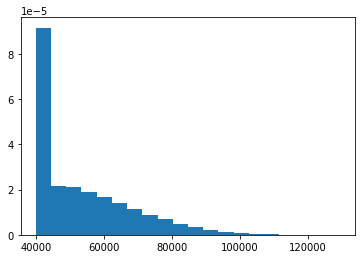

In [3]:
plt.hist(salaryDF['salary'], density=True, bins=20)


In [4]:
#Average salary by title
salaryByTitle = salaryDF.groupby(['title'])
averageSalary = round(salaryByTitle['salary'].mean(),2)
avgSalary = pd.DataFrame(averageSalary)
avgSalary.reset_index(inplace=True)
avgSalary.rename(columns = {"salary" : "avg_salary"}, inplace = "True")
avgSalary

,title,avg_salary
0,Assistant Engineer,48564.43
1,Engineer,48535.34
2,Manager,51531.04
3,Senior Engineer,48506.80
4,Senior Staff,58550.17
5,Staff,58465.38
6,Technique Leader,48582.90


([<matplotlib.axis.XTick at 0x1baa87c5128>,
 [Text(0, 0, 'Assistant Engineer'),
  Text(1, 0, 'Engineer'),
  Text(2, 0, 'Manager'),
  Text(3, 0, 'Senior Engineer'),
  Text(4, 0, 'Senior Staff'),
  Text(5, 0, 'Staff'),
  Text(6, 0, 'Technique Leader')])

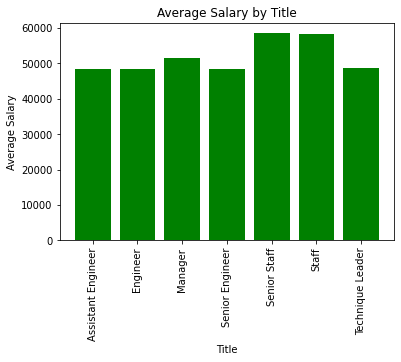

In [5]:
x_pos = [i for i, _ in enumerate(avgSalary['title'])]
plt.bar(x_pos, avgSalary['avg_salary'], color='green')
plt.xlabel("Title")
plt.ylabel("Average Salary")
plt.title("Average Salary by Title")

plt.xticks(x_pos, avgSalary['title'], rotation='vertical')